In [3]:
import zarr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

180
400
620
840
1060
1270
1490
1710
1930


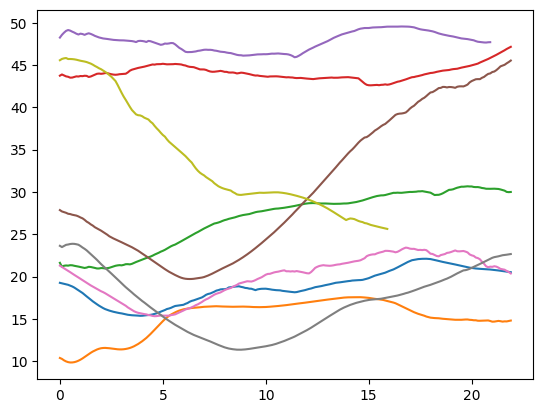

In [39]:
data = zarr.open('.\dataset\CarFollowing/trainHH.zarr', mode='r')
for i in range(1,10):
    start, end = data.index_range[i]
    print(start)
    # get vehicle size
    size_lead = 4.85              # this is for AV
    size_lead = data.lead_size[2] # this is for HV
    size_follow = data.follow_size[2]

    # get timestamps
    timestamps = data.timestamp[start:end]

    # get position, speed, and acceleration
    x_lead = data.lead_centroid[start:end]

    v_lead = data.lead_velocity[start:end]
    a_lead = data.lead_acceleration[start:end]

    x_follow = data.follow_centroid[start:end]
    v_follow = data.follow_velocity[start:end]
    a_follow = data.follow_acceleration[start:end]
    plt.plot(timestamps,x_lead-x_follow)
plt.show()



In [50]:
data = zarr.open('.\dataset\CarFollowing/trainHH.zarr', mode='r')

start, end = data.index_range[0]
# get vehicle size
size_lead = 4.85              # this is for AV
size_lead = data.lead_size[2] # this is for HV
size_follow = data.follow_size[2]

# get timestamps
timestamps = data.timestamp[start:end]
print(timestamps)

[ 0.          0.09999632  0.20006124  0.30021256  0.40039188  0.5005598
  0.60070512  0.70077444  0.80075576  0.90064468  1.00047     1.10027332
  1.20008524  1.2999637   1.40003402  1.50003194  1.59999126  1.69992858
  1.79986676  1.89996568  2.000079    2.10016132  2.20017824  2.30013556
  2.40005988  2.4999508   2.59985912  2.69979444  2.79977076  2.89978468
  2.999853    3.09996132  3.20006024  3.30013456  3.40015188  3.5001168
  3.60005212  3.69997744  3.79991576  3.89987468  3.999873    4.09991332
  4.19998124  4.30006656  4.40013888  4.5001828   4.60019612  4.70016044
  4.80007976  4.89996668  4.99985     5.09974232  5.19968024  5.29969256
  5.39976388  5.4998908   5.60005512  5.70020744  5.80030776  5.90032068
  6.000251    6.10011432  6.19994524  6.29979356  6.39992041  6.4995868
  6.59957212  6.69961844  6.7996975   6.89979668  6.999879    7.09994832
  7.19999224  7.30000756  7.39997288  7.4998818   7.59976812  7.69966944
  7.79960476  7.89958968  7.999625    8.09969746  8.19

In [16]:
def load_single_data(i):
    data = zarr.open('.\dataset\CarFollowing/trainHH.zarr', mode='a')
    start, end = data.index_range[i]

    size_lead = 4.85              # this is for AV
    size_lead = data.lead_size[i] # this is for HV
    size_follow = data.follow_size[i]

    # get timestamps
    timestamps = data.timestamp[start:end]
    # get position, speed, and acceleration
    
    x_lead = data.lead_centroid[start:end]
    v_lead = data.lead_velocity[start:end]
    a_lead = data.lead_acceleration[start:end]
    id=np.ones((1,x_lead.shape[0]))*i
    x_follow = data.follow_centroid[start:end]
    v_follow = data.follow_velocity[start:end]
    a_follow = data.follow_acceleration[start:end]
    array = np.vstack((id, x_lead, v_lead, a_lead, x_follow, v_follow, a_follow))
    return array.T

def load_multi_data(i):
    for x in range(i+1):
        single_data = load_single_data(x)
        if x == 0:
            multi_data = single_data
        else:
            multi_data = np.vstack([multi_data, single_data])
    return(multi_data)
print(load_multi_data(5).shape)

(1270, 7)
